## Q1. 实现mark的几个距离函数，提示：scipy库有直接可用的函数

In [27]:
from scipy.spatial import distance as D
import numpy as np

In [43]:
arr1 = np.random.randn(10)
arr2 = np.random.randn(10)

### Euclidean Distance

In [44]:
dist_eu = D.euclidean(arr1, arr2)
dist_eu

4.728526367213847

### Manhattan Distance

In [45]:
dist_man = D.cityblock(arr1, arr2)
dist_man

12.033171768588012

### Standardized Euclidean

In [48]:
dist_stdeu = D.seuclidean(arr1,arr2,V=np.ones(arr1.shape))
dist_stdeu


4.728526367213847

### Hamming Distance

In [21]:
x = np.random.randint(2, size=(1,10))
y = np.random.randint(2, size=(1,10))

dist_ham = D.hamming(x,y)
dist_ham

0.4

### Cosine distance

In [23]:
dist_cos = D.cosine(arr1,arr2)
dist_cos

0.6408049176901605

### Jaccard Distance

In [25]:
dist_jac = D.jaccard(x,y)
dist_jac

0.5

### Pearson correlation

In [27]:
crr = D.correlation(arr1,arr2)
crr

0.9282747075722786

## Q2.实现标准化过程

In [49]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data = np.random.randn(1000,1) + 10
data = sc.fit_transform(data)

## Q3. 使用随机数据证明等价关系

In [16]:
import matplotlib.pyplot as plt



In [56]:
dist_eus, dist_coss, corrs  = [], [], []

for i in range(100):
    d1 = np.random.randn(100) * np.random.randint(11) + np.random.randn()
    d2 = np.random.randn(100) * np.random.randint(11) + np.random.randn()
    dist_eus.append(D.seuclidean(d1,d2,V=np.ones(d1.shape)))
    dist_coss.append(D.cosine(d1,d2))
    corrs.append(D.correlation(d1,d2))

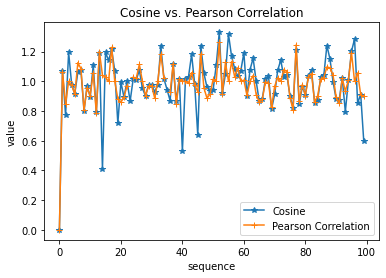

In [60]:
plt.plot(dist_coss, '*-',)
plt.plot(corrs, '+-')
plt.xlabel('sequence')
plt.ylabel('value')
plt.title('Cosine vs. Pearson Correlation')
plt.legend(['Cosine','Pearson Correlation'])


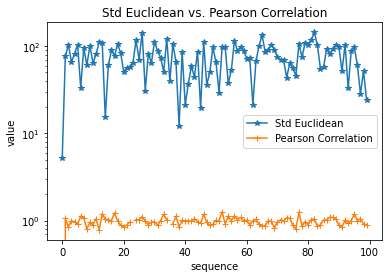

In [70]:
plt.plot(dist_eus, '*-',)
plt.plot(corrs, '+-')
plt.xlabel('sequence')
plt.ylabel('value')
plt.yscale('log')
plt.title('Std Euclidean vs. Pearson Correlation')
plt.legend(['Std Euclidean','Pearson Correlation'])

## Q4 & Q5 : 在案例中交叉验证K，观察不同K对模型的影响, 用KNN实现房价回归问题

In [1]:
import pandas as pd 
from sklearn.datasets import load_boston


In [2]:
boston = load_boston()
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
data['PRICE'] = boston.target
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [8]:
mses = []
for K in range(1,20):
    k_reg = KNeighborsRegressor(n_neighbors=K)
    k_reg.fit(x_train, y_train)
    mses.append(mean_squared_error(y_test, k_reg.predict(x_test)))

Text(0, 0.5, 'MSE')

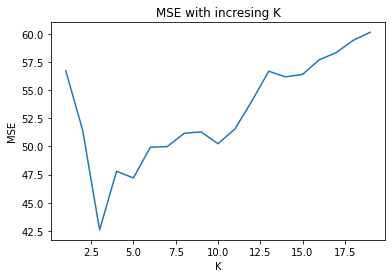

In [12]:
plt.plot(range(1,20), mses)
plt.title('MSE with incresing K')
plt.xlabel('K')
plt.ylabel('MSE')


In [131]:
np.argmin(mses)

1

In [17]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

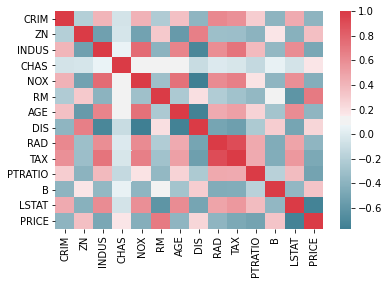

In [18]:
data_corr = data.corr()
sns.heatmap(data_corr, cmap=sns.diverging_palette(220,10,as_cmap = True))

In [19]:
data_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [20]:
x_data = data.loc[:,['RM','LSTAT']]
sc = StandardScaler()
x_data = pd.DataFrame(sc.fit_transform(x_data))
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size=0.2)

In [40]:
K = list(range(2,31,1))
mses = []
scores = []
best_k = 0
kf = KFold(n_splits=10,shuffle=True,random_state=0)
for k in K:
    mse, score = 0, 0
    for batch_train, batch_valid in kf.split(x_train):
        knn_reg = KNeighborsRegressor(n_neighbors=k)
        knn_reg.fit(x_train.iloc[batch_train], y_train.iloc[batch_train])
        score = score + knn_reg.score(x_train.iloc[batch_valid], y_train.iloc[batch_valid])
        mse = mse + mean_squared_error(y_train.iloc[batch_valid], knn_reg.predict(x_train.iloc[batch_valid]))
    mses.append(mse/10)
    scores.append(score/10)




Text(0, 0.5, 'Scores')

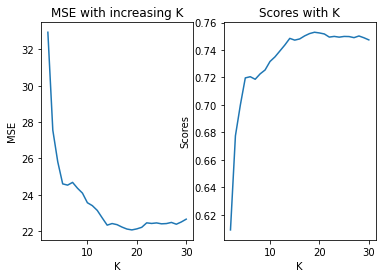

In [41]:
fig, ax = plt.subplots(1,2)
ax[0].plot(K, mses)
ax[0].set_title('MSE with increasing K')
ax[0].set_xlabel('K')
ax[0].set_ylabel('MSE')
ax[1].plot(K, scores)
ax[1].set_title('Scores with K')
ax[1].set_xlabel('K')
ax[1].set_ylabel('Scores')



In [42]:
print(f'Best MSE for K : {K[np.argmin(mses)]}')
print(f'Best score for K : {K[np.argmax(scores)]}')


Best MSE for K : 19
Best score for K : 19


## Q6.用朴素贝叶斯求解手写字体识别项目，观察模型准确率

In [62]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix

In [5]:
(xdata, ydata), (xtdata, ytdata) = mnist.load_data()

In [20]:
def con2Vect(data):
    data_mat = np.zeros((data.shape[0],784))
    for i in range(data.shape[0]):
        v = xdata[i].reshape(1, -1)
        v = (v > 0).astype(int)
        data_mat[i,:] = v
    return data_mat
        


In [46]:
x_train = con2Vect(xdata)
x_test = con2Vect(xtdata)
y_train = ydata
y_test = ytdata

In [55]:
classifier = CategoricalNB(alpha=1)
classifier.fit(x_train,y_train)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [56]:
y_pred = classifier.predict(x_test)

In [67]:
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

Accuracy is  0.1004
[[104 101 102 103  95  73 102  87 100 113]
 [105 152 109 121 116  92 115  97 104 124]
 [109 133  82 111  93  81 109  97 107 110]
 [107 143  76  99 103  69  98 104  91 120]
 [ 84 127 101  97  98  80 104 100  84 107]
 [ 73 134  74  90  88  71  91  85  79 107]
 [ 96 116  95 106  97  61  87  94  99 107]
 [ 99 113 103  99 107  93 107 115  93  99]
 [107 123  94 118  87  62  89  89  98 107]
 [100 121  95 120  97  71 123 102  82  98]]


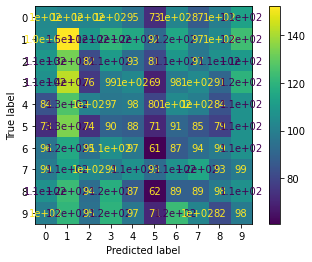

In [72]:
print(f'Accuracy is {acc: .4f}')
print(cm)
plot_confusion_matrix(classifier, x_test, y_test)

In [73]:
from sklearn.naive_bayes import MultinomialNB

In [82]:
clf = MultinomialNB(alpha=1)
clf.fit(x_train, y_train)
clf_acc = accuracy_score(y_test, clf.predict(x_test))
clf_cm = confusion_matrix(y_test, clf.predict(x_test))

Accuracy is  0.1018
[[105  86  96 101  88  61 109  83 128 123]
 [107 154 107 122 103  69 121  89 133 130]
 [108 127  81 115  82  64 112  92 129 122]
 [109 140  78  97  91  53 100  98 111 133]
 [ 89 123  98 102  93  67 105  95 102 108]
 [ 74 127  77  83  83  61  98  87  92 110]
 [ 95 108  97 106  94  49  90  85 116 118]
 [101 105  99  96  92  77 116 107 120 115]
 [107 123  89 112  79  51  92  88 122 111]
 [ 99 114  95 116  82  56 130  96 113 108]]


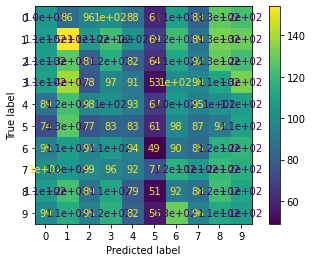

In [83]:
print(f'Accuracy is {clf_acc: .4f}')
print(clf_cm)
plot_confusion_matrix(clf, x_test, y_test)